In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
# !pip install dython
from dython.nominal import associations
from matplotlib import colors as mcolors
from scipy.stats import chi2_contingency

### Data Preparation

In [2]:
df0 = pd.read_csv(r"C:\Users\Katia\Documents\UofT\STATS\final_project\universitydataset.csv")

In [3]:
df0 = df0[df0['Target'] != 'Enrolled'].reset_index(drop=True) # Only want graduated and dropout outcomes

# Transform output into binary
df0.loc[df0['Target'] == 'Graduate','Target'] = 0
df0.loc[df0['Target'] == 'Dropout','Target'] = 1

rename_cols = {"Mother's qualification":'Mothers qualification',
                    "Father's qualification": 'Fathers qualification',
                    "Mother's occupation":'Mothers occupation',    
                    "Father's occupation":'Fathers occupation',
                    "Nacionality":'Nationality'}

df0.rename(columns= rename_cols, inplace=True)

# Create a new variable: 1st sem (approved/enrolled)
df0['Curricular units 1st sem (approved/enrolled)'] = (df0['Curricular units 1st sem (approved)']/df0['Curricular units 1st sem (enrolled)'])


In [4]:
# Reducing the number of categories for attributes with too many categories.
relabel_occupation = {1:10,	16:4,	31:5,	6:5,	21:9,	36:1,	11:4,	26:7,	41:1,	
                    2:6,	17:6,	32:5,	7:2,	22:7,	37:1,	12:11,	27:3,	42:1,	
                    3:7,	18:5,	33:5,	8:1,	23:7,	38:1,	13:11,	28:7,	43:8,	
                    4:1,	19:7,	34:2,	9:1,	24:3,	39:1,	14:4,	29:3,	44:8,	
                    5:3,	20:7,	35:2,	10:8,	25:3,	40:1,	15:4,	30:5,	45:5,	46:8}


relabel_qualification = {1:4,	6:6,	11:3,	16:7,	21:2,	26:2,	31:7,
2:6,	7:3,	12:3,	17:7,	22:7,	27:2,	32:7,
3:6,	8:3,	13:7,	18:2,	23:7,	28:2,	33:6,
4:6,	9:2,	14:2,	19:3,	24:8,	29:7,	34:6,
5:6,	10:3,	15:7,	20:2,	25:1,	30:5}

relabel_previous_qualification = {1:4,	9:3,	4:6,	12:2,	7:3,	15:5,
2:6,	10:3,	5:6,	13:2,	8:3,	16:7,
3:6,	11:3,	6:6,	14:7,	17:6}

relabel_course = {10:3, 17:9}

df0.replace(to_replace={'Mothers occupation':relabel_occupation}, inplace=True)
df0.replace(to_replace={'Fathers occupation':relabel_occupation}, inplace=True)

df0.replace(to_replace={'Mothers qualification':relabel_qualification}, inplace=True)
df0.replace(to_replace={'Fathers qualification':relabel_qualification}, inplace=True)

df0.replace(to_replace={'Previous qualification':relabel_previous_qualification}, inplace=True)
df0.replace(to_replace={'Course':relabel_course}, inplace=True)

In [5]:
# Split variables into categories to apply the corresponding correlation method
cat_vars = ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nationality',
              'Mothers qualification', 'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
              'Daytime/evening attendance', 'Displaced','Tuition fees up to date','Gender', 
              'Scholarship holder', 'International', 'Educational special needs', 'Debtor', 'Target']

for i in cat_vars:
    df0[i] = df0[i].astype(float)
    
binary_vars = ['Daytime/evening attendance', 'Displaced','Tuition fees up to date','Gender', 
              'Scholarship holder', 'International', 'Educational special needs', 'Debtor']

cont_vars = ['Age at enrollment','Application order','Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 
       'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (approved/enrolled)']


print("# categorical variables (includes Target): ",len(cat_vars))
print("# continuous variables (includes one newly created variable): ", len(cont_vars))

# categorical variables (includes Target):  18
# continuous variables (includes one newly created variable):  18


### Plot: Continous Data

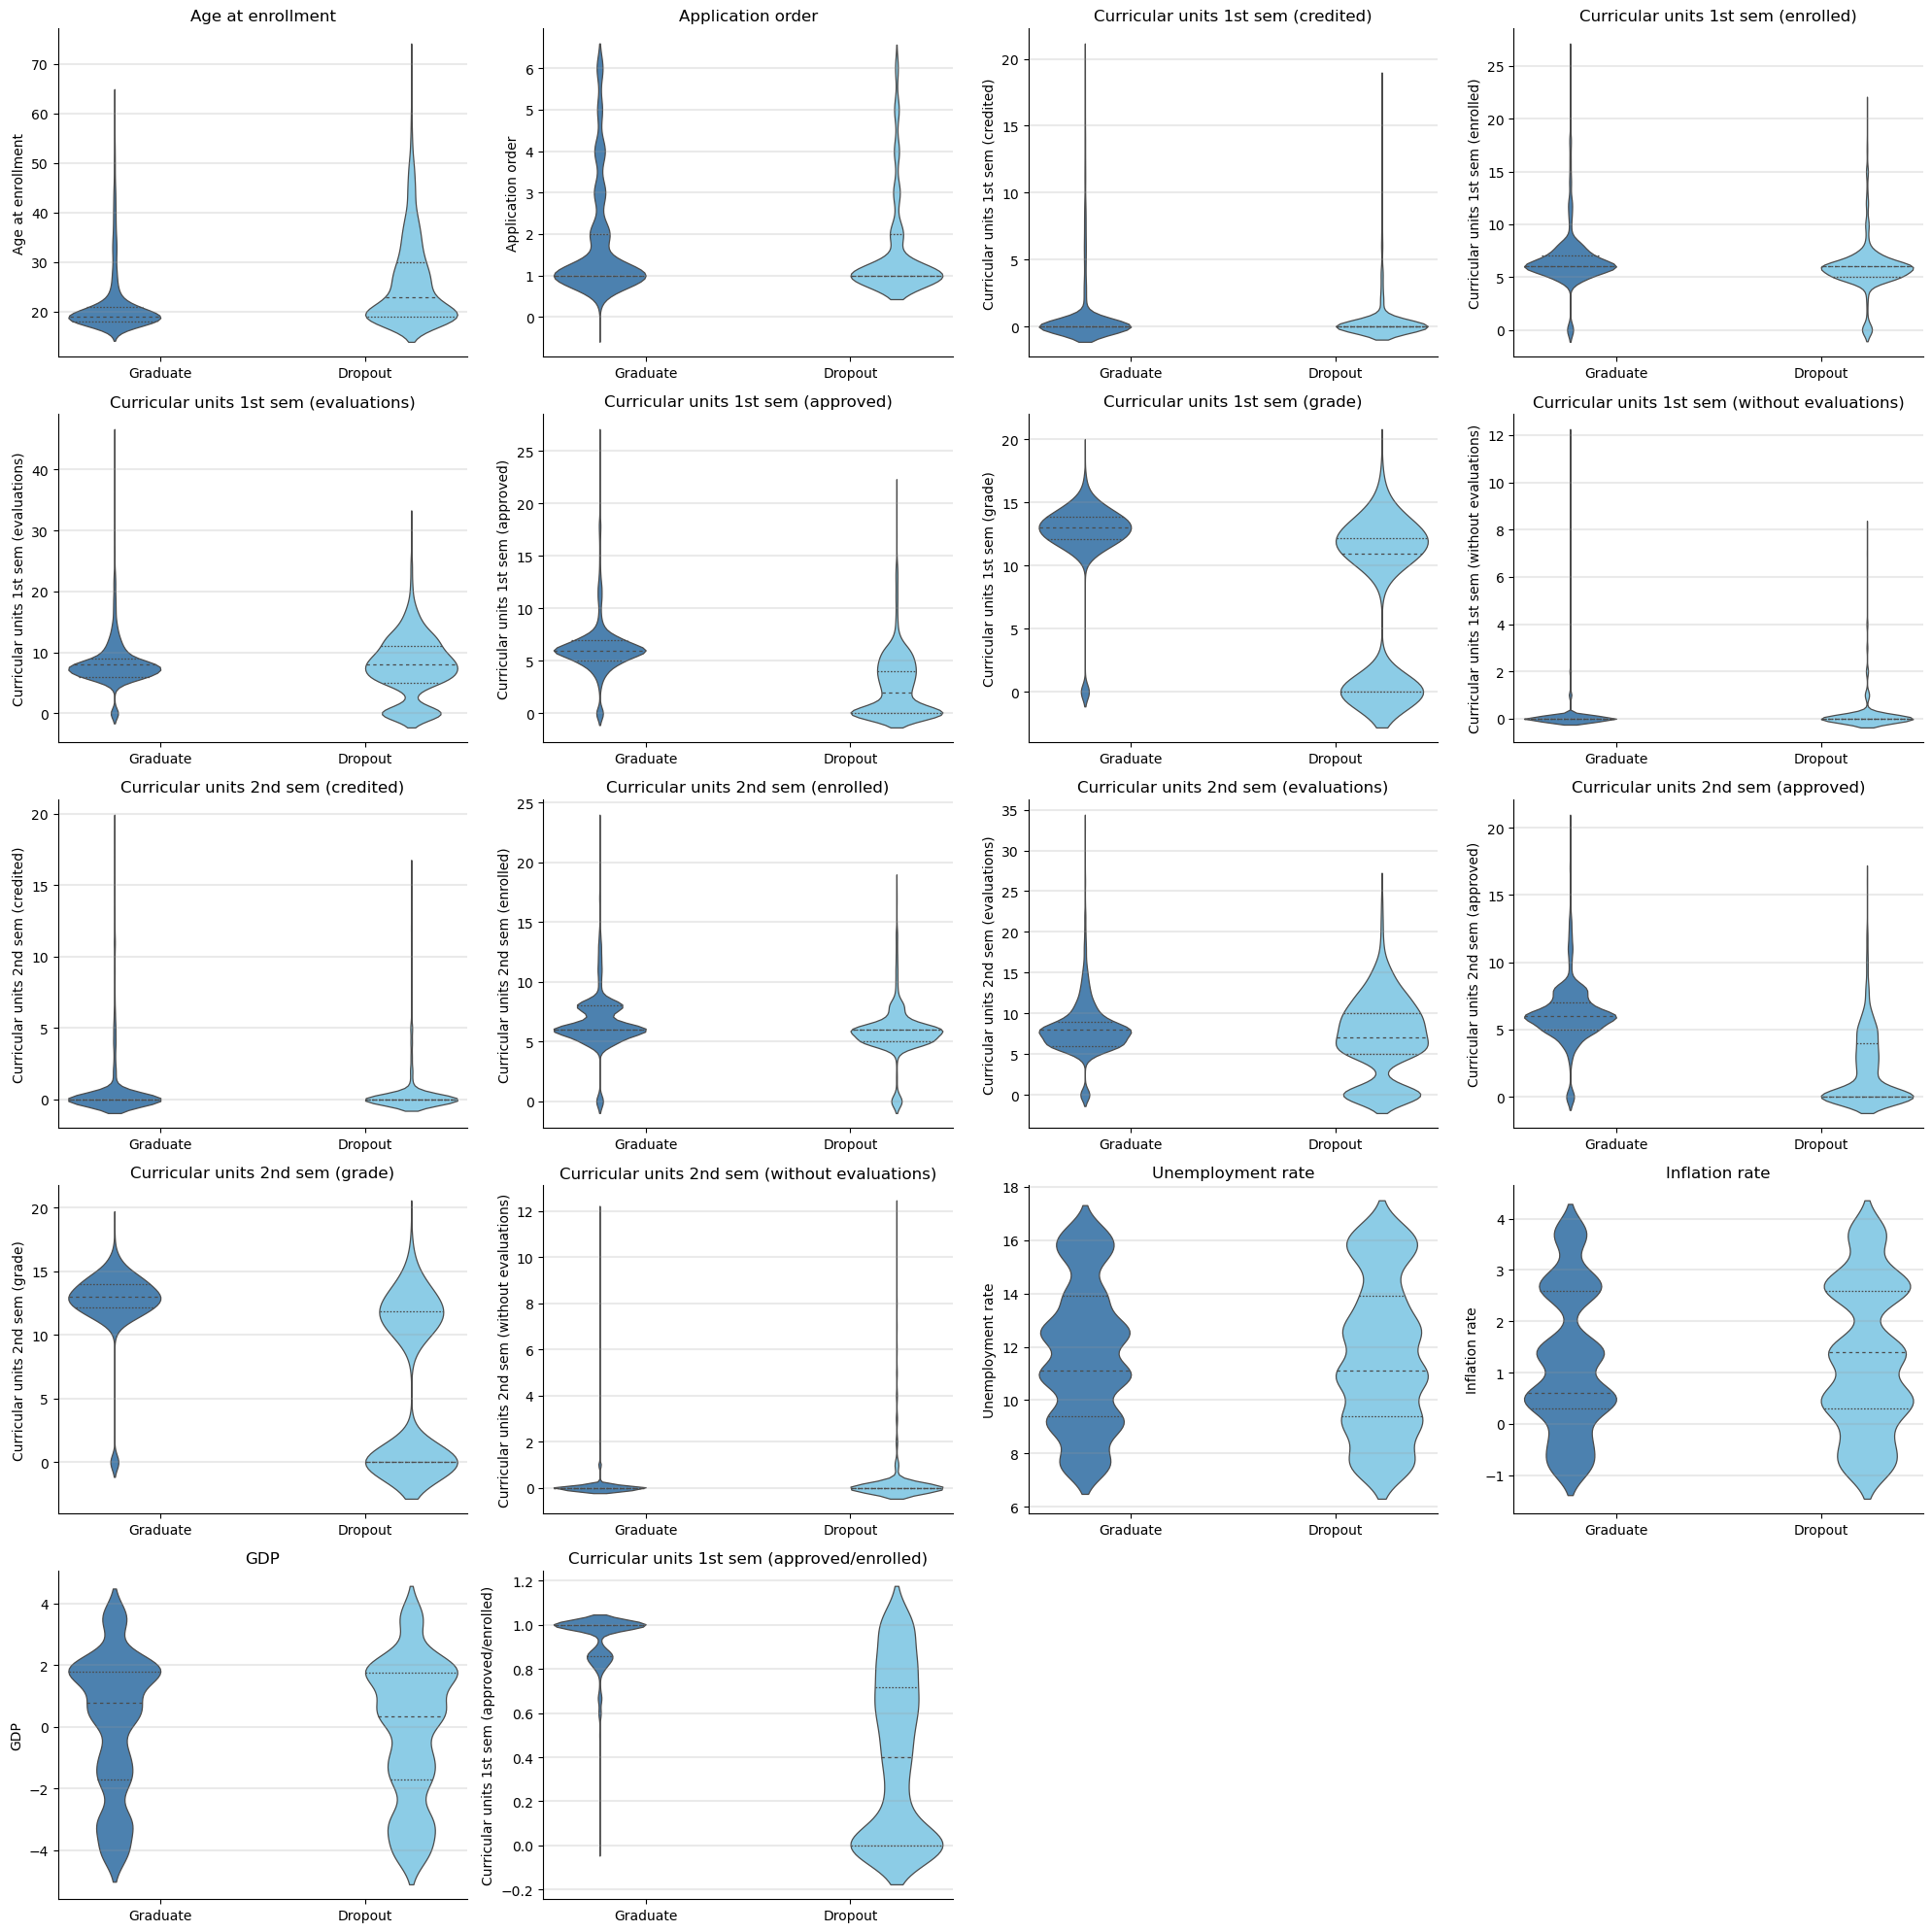

In [6]:
#  Continuous Data
a = 5  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter


fig = plt.figure(figsize = (20,20))

for i in cont_vars:

    df0_ = df0.explode(i)
    df0_[i] = df0_[i].astype('float')

    plt.subplot(a, b, c)
    
    sns.violinplot(
        data=df0_,
        x="Target",
        y=i,
        dodge=True,   # separate plots of different colors
        width=0.9,    # width of plots
        palette=['steelblue','skyblue'],
        hue = 'Target',
        saturation= 0.9,
        linewidth=0.9,
        inner="quart")
    
    # remove top and right borders
    for pos in ['top', 'right']: plt.gca().spines[pos].set_visible(False)

    plt.title('{}'.format(i))
    plt.xlabel(None)
    plt.xticks([0,1],['Graduate','Dropout'])
    plt.grid(linestyle='-', linewidth=1.5, color='#999999', alpha=0.2, axis='y')
    plt.legend().remove()
    
    c = c + 1

plt.tight_layout()
plt.show()

### Plot: Categorical Data

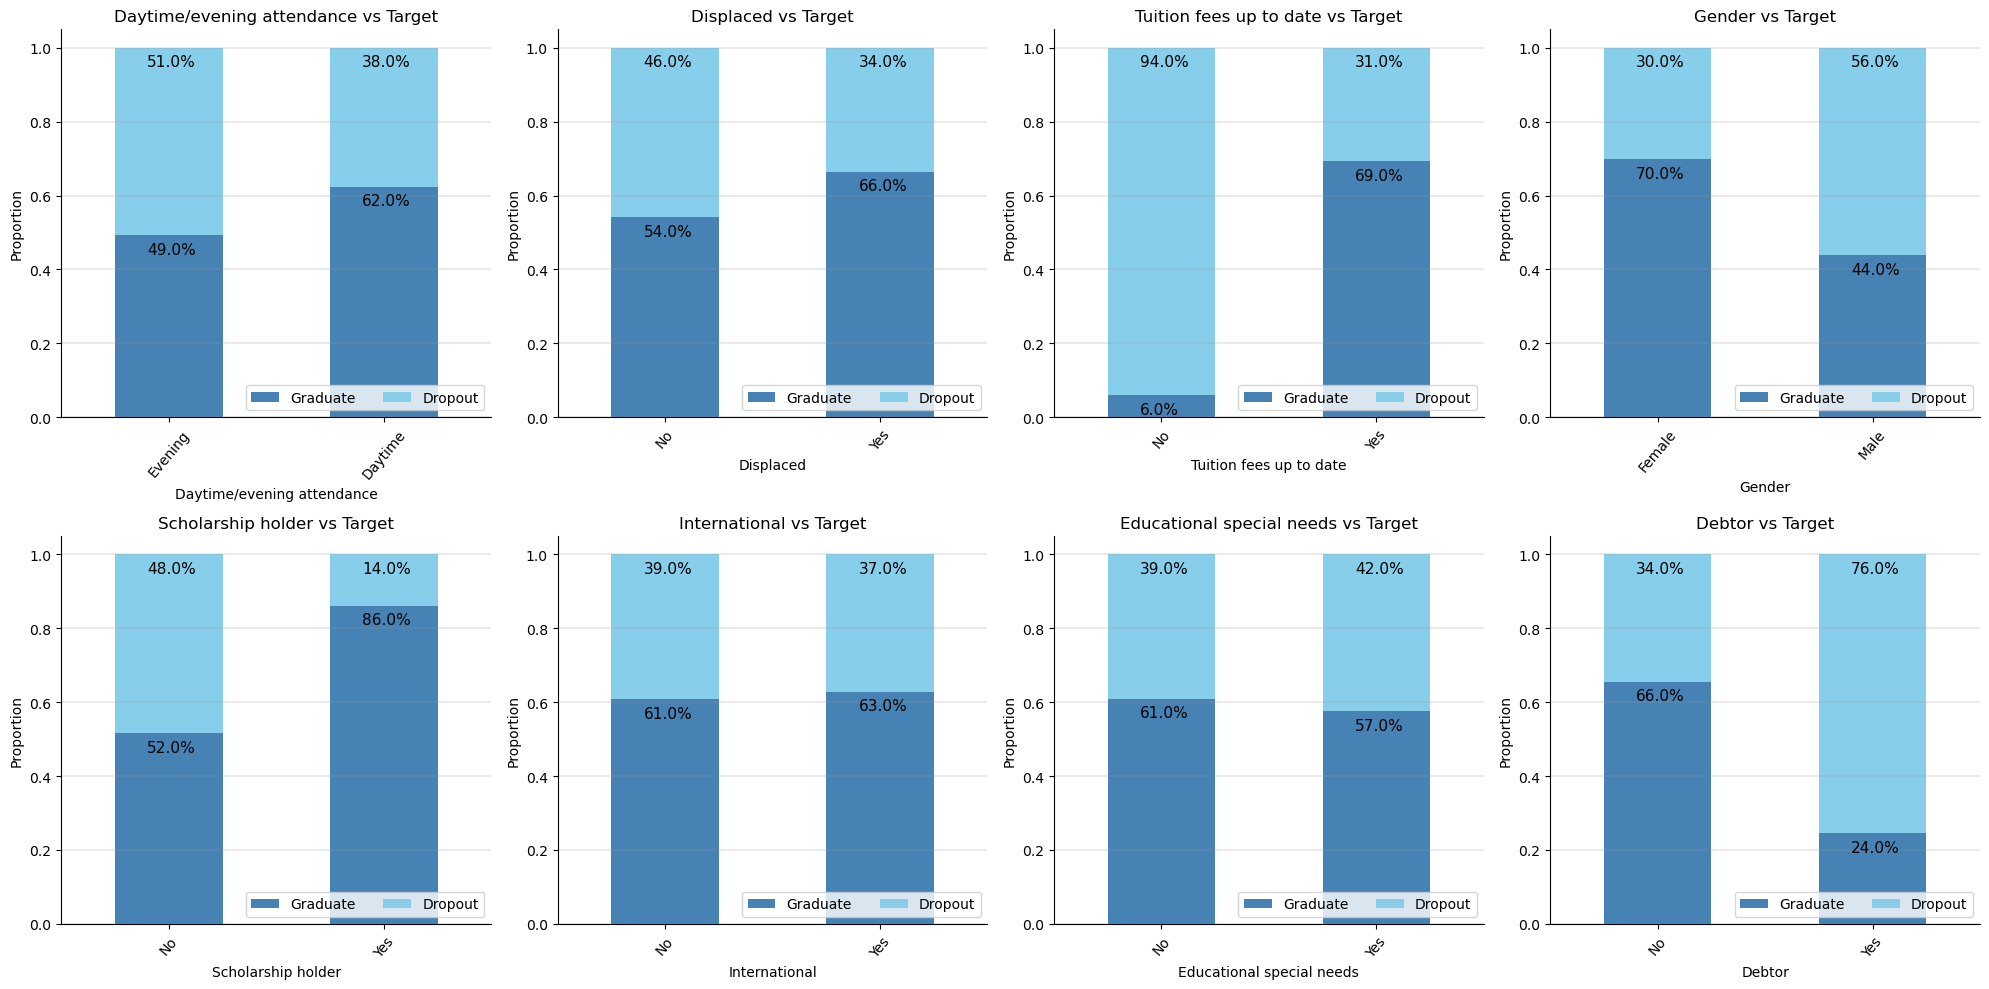

In [7]:
# Plotting binary first

a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (20,10))


for i in binary_vars:

    df1 = df0.loc[:,['Target', i]]

    cross_tab_prop = pd.crosstab(index=df1[i],
                                 columns=df1['Target'],
                                 normalize="index")

    cross_tab = pd.crosstab(index=df1[i],
                            columns=df1['Target'])
    
    cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        color = ['steelblue','skyblue'], 
                        ax =plt.subplot(a, b, c))
    
    plt.legend(loc="lower right", ncol=2, labels = ['Graduate','Dropout'])
    plt.title('{} vs Target'.format(i))
    plt.xlabel(i)
    plt.ylabel("Proportion")
    plt.grid(linestyle='-', linewidth=1.5, color='#999999', alpha=0.2, axis='y')

    # x-ticks
    if i == 'Gender': plt.xticks([0,1],['Female','Male'])
    if i == 'Daytime/evening attendance': plt.xticks([0,1],['Evening','Daytime'])
    if i not in ['Gender','Daytime/evening attendance']: plt.xticks([0,1],['No','Yes'])

    plt.xticks(rotation=50)

    # add % tags to the bars
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):

            plt.text(x = n - 0.1,
                     y = y_loc - 0.05,
                     s = f'{np.round(proportion * 100, 0)}%', 
                     color = "black",
                     fontsize = 11)

    # remove top and right borders
    for pos in ['top', 'right']: plt.gca().spines[pos].set_visible(False)
    
    c = c + 1

plt.tight_layout()
plt.show()


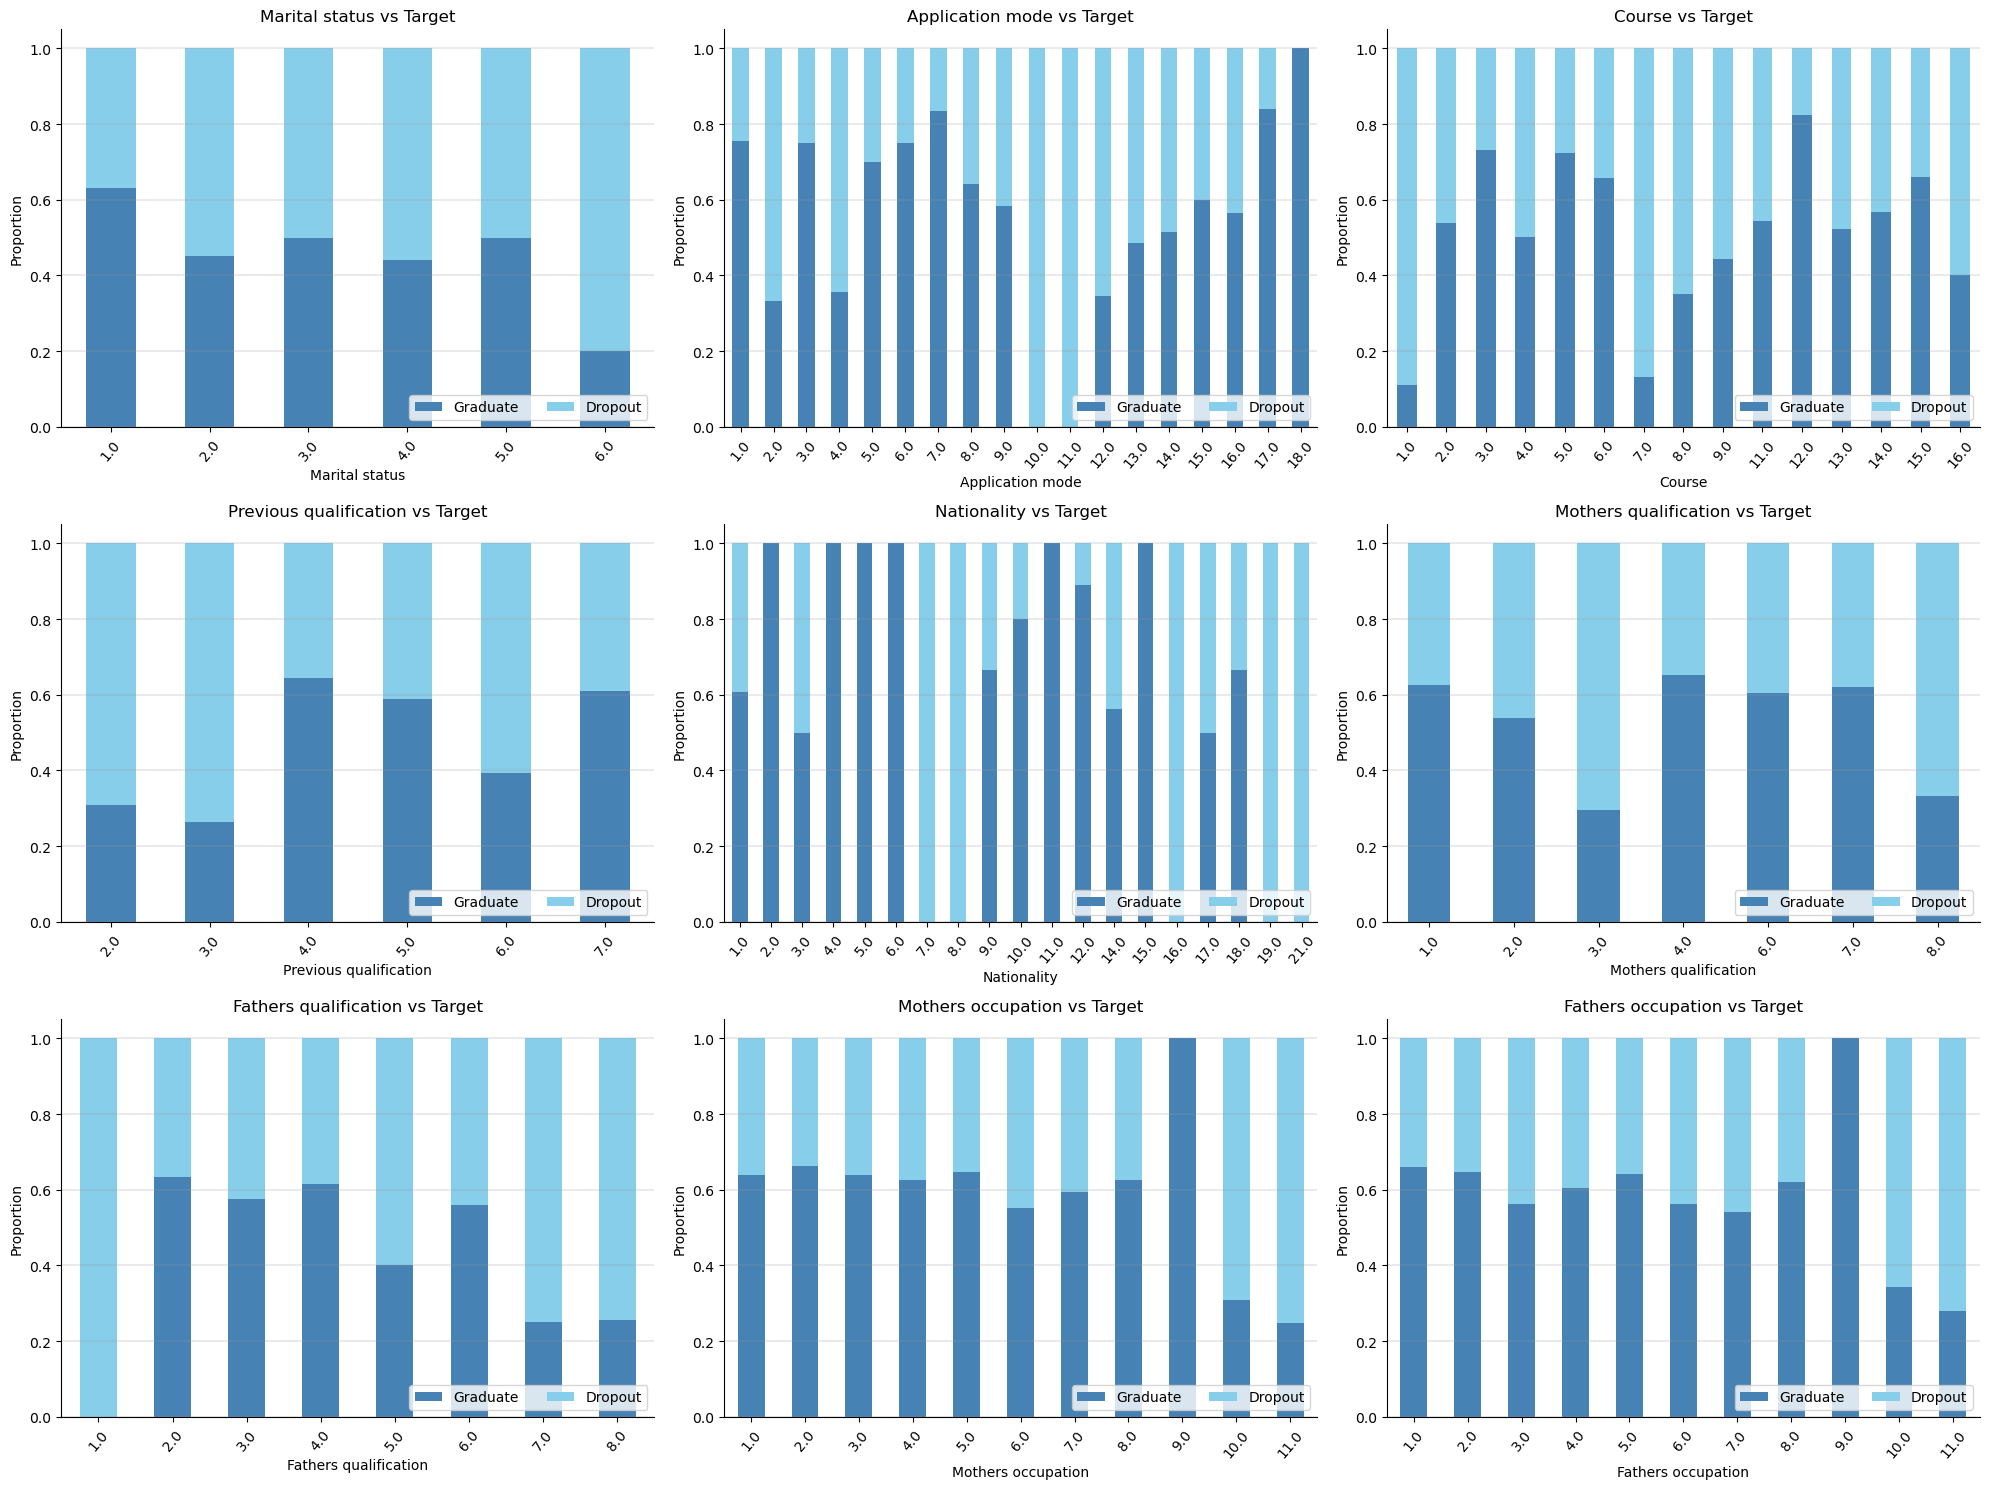

In [8]:
# Plotting non-binary

cat_nonbinary_vars = [e for e in cat_vars if e not in binary_vars][:-1]

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (20,15))


for i in cat_nonbinary_vars:

    df1 = df0.loc[:,['Target', i]]

    cross_tab_prop = pd.crosstab(index=df1[i],
                                 columns=df1['Target'],
                                 normalize="index")
    

    cross_tab = pd.crosstab(index=df1[i],
                            columns=df1['Target'])
    
    cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        color = ['steelblue','skyblue'],
                        ax =plt.subplot(a, b, c)
                       )

    plt.legend(loc="lower right", ncol=2, labels = ['Graduate','Dropout'])
    plt.title('{} vs Target'.format(i))
    plt.xlabel(i)
    plt.ylabel("Proportion")
    plt.xticks(rotation=50)
    plt.grid(linestyle='-', linewidth=1.5, color='#999999', alpha=0.2, axis='y')

    # remove top and right borders
    for pos in ['top', 'right']: plt.gca().spines[pos].set_visible(False)

    c = c + 1

plt.tight_layout()
plt.show()

### T-test for Continuous vs. Target

In [9]:
# For every cont variable, check if the Graduate and Dropout groups have equal variance.
diff_variance_vars = []
equal_variance_vars = []

for i in cont_vars:
    var_diff = np.round(np.absolute(df0[df0['Target']==1][i].var() - df0[df0['Target']==0][i].var()),2)
    if var_diff < 1: equal_variance_vars.append(i)
    if var_diff >= 1: diff_variance_vars.append(i)

print(diff_variance_vars)
print(equal_variance_vars)

['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
['Application order', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (approved/enrolled)']


In [10]:
# NA are students not enrolled in any 1st sem course i.e. division by 0.
df0['Curricular units 1st sem (approved/enrolled)'].fillna(0, inplace=True)

In [11]:
test_results = pd.DataFrame()
p_val = 0.01

# run t-test for equal variances
for i in equal_variance_vars:
    group1 = df0[df0['Target']==1][i]
    group2 = df0[df0['Target']==0][i]
    t_test = [stats.ttest_ind(group1, group2, axis=0, equal_var=True, alternative='two-sided')]
    t_test = pd.DataFrame(t_test)
    t_test['variable'] = i
    t_test['n1'] = len(group1)
    t_test['n2'] = len(group2)
    test_results = pd.concat([test_results,t_test])

# run t-test for unequal variances    
for i in diff_variance_vars:
    group1 = df0[df0['Target']==1][i]
    group2 = df0[df0['Target']==0][i]
    t_test = [stats.ttest_ind(group1, group2, axis=0, equal_var=False, alternative='two-sided')]
    t_test = pd.DataFrame(t_test)
    t_test['variable'] = i
    t_test['n1'] = len(group1)
    t_test['n2'] = len(group2)
    test_results = pd.concat([test_results,t_test])
    
test_results.reset_index(drop=True, inplace=True)
test_results = test_results[['variable','n1','n2','statistic','pvalue']]
test_results.loc[test_results['pvalue']< p_val,'test_result'] = 1  # variable IS statistically significant
test_results.loc[test_results['pvalue']>= p_val,'test_result'] = 0 # variable IS NOT statistically significant
test_results['t-abs'] = np.abs(test_results['statistic'])
test_results.sort_values(by='t-abs', ascending=False)

,variable,n1,n2,statistic,pvalue,test_result,t-abs
7,Curricular units 1st sem (approved/enrolled),1421,2209,-54.396784,0.000000e+00,1.0,54.396784
16,Curricular units 2nd sem (approved),1421,2209,-50.671268,0.000000e+00,1.0,50.671268
17,Curricular units 2nd sem (grade),1421,2209,-39.504220,1.768346e-245,1.0,39.504220
12,Curricular units 1st sem (approved),1421,2209,-39.306474,1.307655e-269,1.0,39.306474
13,Curricular units 1st sem (grade),1421,2209,-31.690690,2.399283e-175,1.0,31.690690
8,Age at enrollment,1421,2209,15.796570,1.252287e-53,1.0,15.796570
2,Curricular units 2nd sem (enrolled),1421,2209,-11.205396,1.128426e-28,1.0,11.205396
10,Curricular units 1st sem (enrolled),1421,2209,-10.122656,9.676921e-24,1.0,10.122656
15,Curricular units 2nd sem (evaluations),1421,2209,-6.666051,3.295788e-11,1.0,6.666051
3,Curricular units 2nd sem (without evaluations),1421,2209,6.217994,5.607154e-10,1.0,6.217994


### Chi-square Categorical vs. Target

In [12]:
df_P = pd.DataFrame({'variable':cat_vars[:-1]}) # last item is the Target

p_values=[]
for i in cat_vars[:-1]:

# Performing test for Variable: Debtor
    CrosstabResult=pd.crosstab(index=df0[i],columns=df0['Target'])

    ChiSqResult = chi2_contingency(CrosstabResult)
    p_values.append(ChiSqResult[1])

df_P['pvalue'] = p_values
p_val = 0.01
df_P.loc[df_P['pvalue']< p_val,'test_result'] = 1  # variable IS statistically significant
df_P.loc[df_P['pvalue']>= p_val,'test_result'] = 0 # variable IS NOT statistically significant

df_P

,variable,pvalue,test_result
0,Marital status,3.160761e-10,1.0
1,Application mode,8.435153e-73,1.0
2,Course,7.389961e-81,1.0
3,Previous qualification,1.678957e-27,1.0
4,Nationality,3.412815e-01,0.0
5,Mothers qualification,2.877852e-16,1.0
6,Fathers qualification,2.362734e-15,1.0
7,Mothers occupation,1.202485e-19,1.0
8,Fathers occupation,2.138908e-16,1.0
9,Daytime/evening attendance,4.728747e-07,1.0


### Correlation Matrix

In [13]:
# keep only variables statistically relevant to the Target
cont_vars_statistically_significant = np.array(test_results[test_results['test_result'] == 1]['variable']) 
cat_vars_statistically_significant = np.array(df_P[df_P['test_result'] == 1]['variable'])

print(cont_vars_statistically_significant)
print('# continuous variables excluded: ',len(cont_vars)-len(cont_vars_statistically_significant))
print('----------------')
print(cat_vars_statistically_significant)
print('# categorical variables excluded: ', len(cat_vars[:-1])-len(cat_vars_statistically_significant))

['Application order' 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (without evaluations)' 'GDP'
 'Curricular units 1st sem (approved/enrolled)' 'Age at enrollment'
 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)']
# continuous variables excluded:  2
----------------
['Marital status' 'Application mode' 'Course' 'Previous qualification'
 'Mothers qualification' 'Fathers qualification' 'Mothers occupation'
 'Fathers occupation' 'Daytime/evening attendance' 'Displaced'
 'Tuition fees up to date' 'Gender' 'Scholarship holder' 'Debtor']
# categorical variables excluded:  3


In [14]:
# creating a custom color map for our correlation matrix
def create_custom_cmap():
    # define colors for negative and positive values
    neg_color = plt.cm.summer(0.5)
    pos_color = plt.cm.summer(0.5)

    # create a colormap
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom_cmap',
        [   (*neg_color[:-1], 1),  
            (*neg_color[:-1], 0.8),  
            (1, 1, 1, 1),            
            (*pos_color[:-1], 0.8), 
            (*pos_color[:-1], 1)  ],
        N=256  # number of steps in the colormap
    )
    return cmap

cmap = create_custom_cmap()

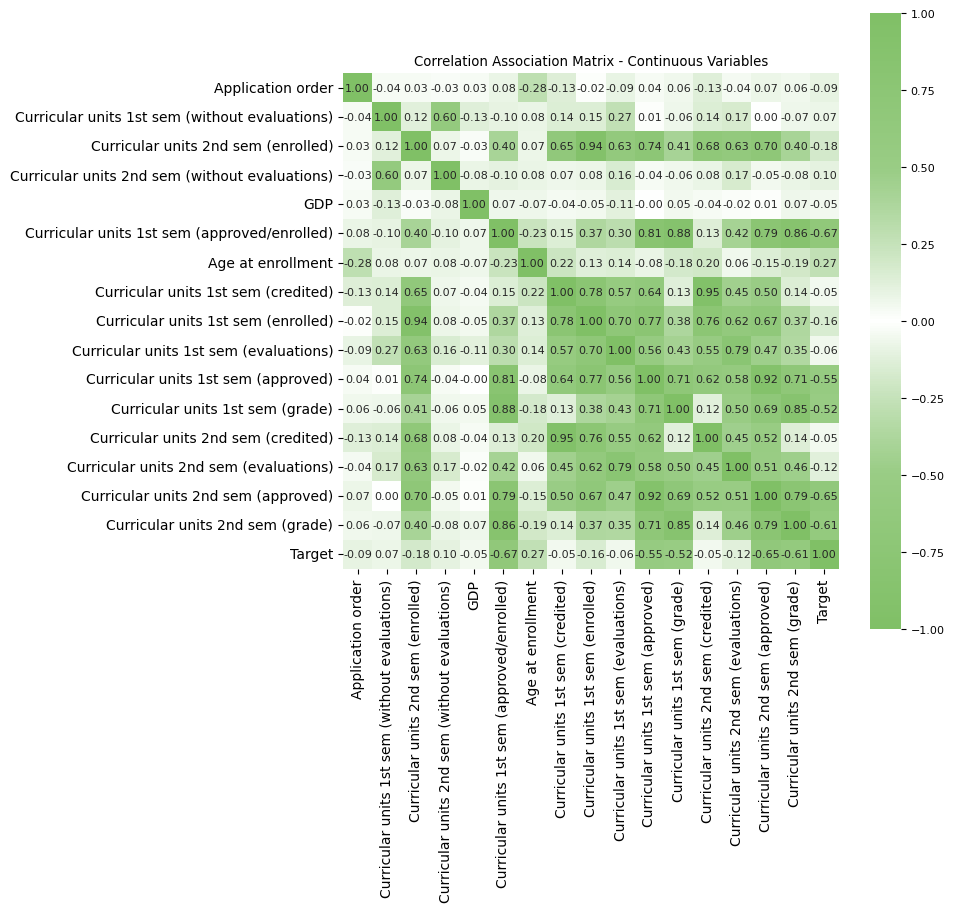

In [15]:
# Continuous Variables
# Generate Cramer's V Correlation ratio association plot
fig, ax1 = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 8})

cor_ratio = associations(df0[np.append(cont_vars_statistically_significant, ['Target']) ],
                        nom_num_assoc = 'correlation_ratio', 
                        num_num_assoc = 'pearson', 
                        cmap = cmap, 
                        ax = ax1, 
                        title = 'Correlation Association Matrix - Continuous Variables')
plt.show()

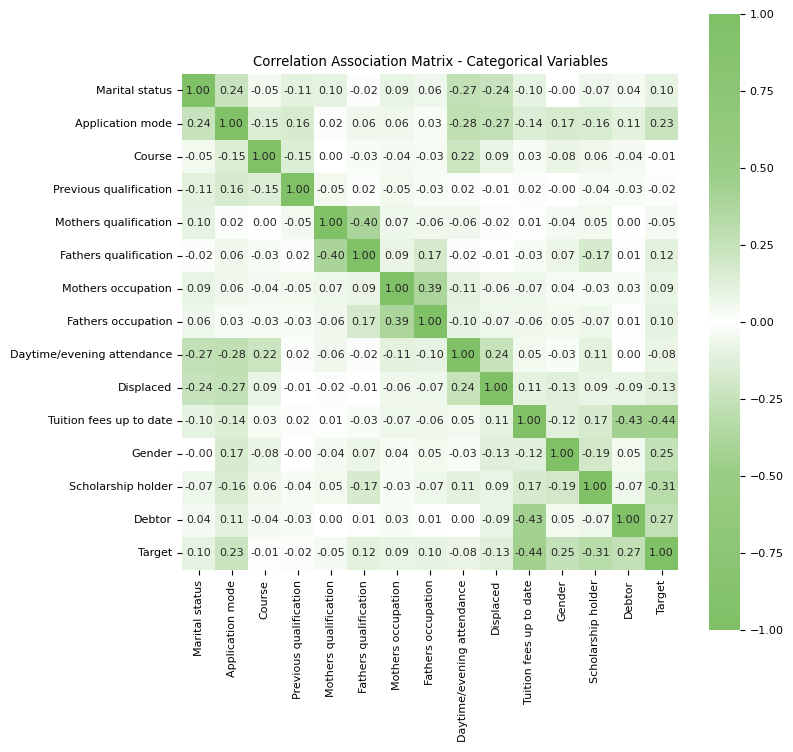

In [16]:
# Categorical Variables
# Generate Cramer's V Correlation ratio association plot
fig, ax2 = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 8})
cramers_v = associations(df0[np.append(cat_vars_statistically_significant, ['Target']) ], 
                        nom_nom_assoc = 'cramer', 
                        cmap = cmap,#'Spectral', 
                        ax = ax2, 
                        title = 'Correlation Association Matrix - Categorical Variables')
plt.show()


In [17]:
# keep only variables with moderate or higher strength (ratio >= 0.3)
min_ratio = 0.3

# categorical
cat_corr_matrix = cramers_v.get('corr')
df_strong_cat_vars = cat_corr_matrix[np.abs(cat_corr_matrix['Target'])>= min_ratio]
df_strong_cat_vars = df_strong_cat_vars[df_strong_cat_vars.index]

# continuous
cont_corr_matrix = cor_ratio.get('corr')
df_strong_cont_vars = cont_corr_matrix[np.abs(cont_corr_matrix['Target'])>= min_ratio]
df_strong_cont_vars = df_strong_cont_vars[df_strong_cont_vars.index]

df_strong_cat_vars


,Tuition fees up to date,Scholarship holder,Target
Tuition fees up to date,1.000000,0.169590,-0.442138
Scholarship holder,0.169590,1.000000,-0.313018
Target,-0.442138,-0.313018,1.000000


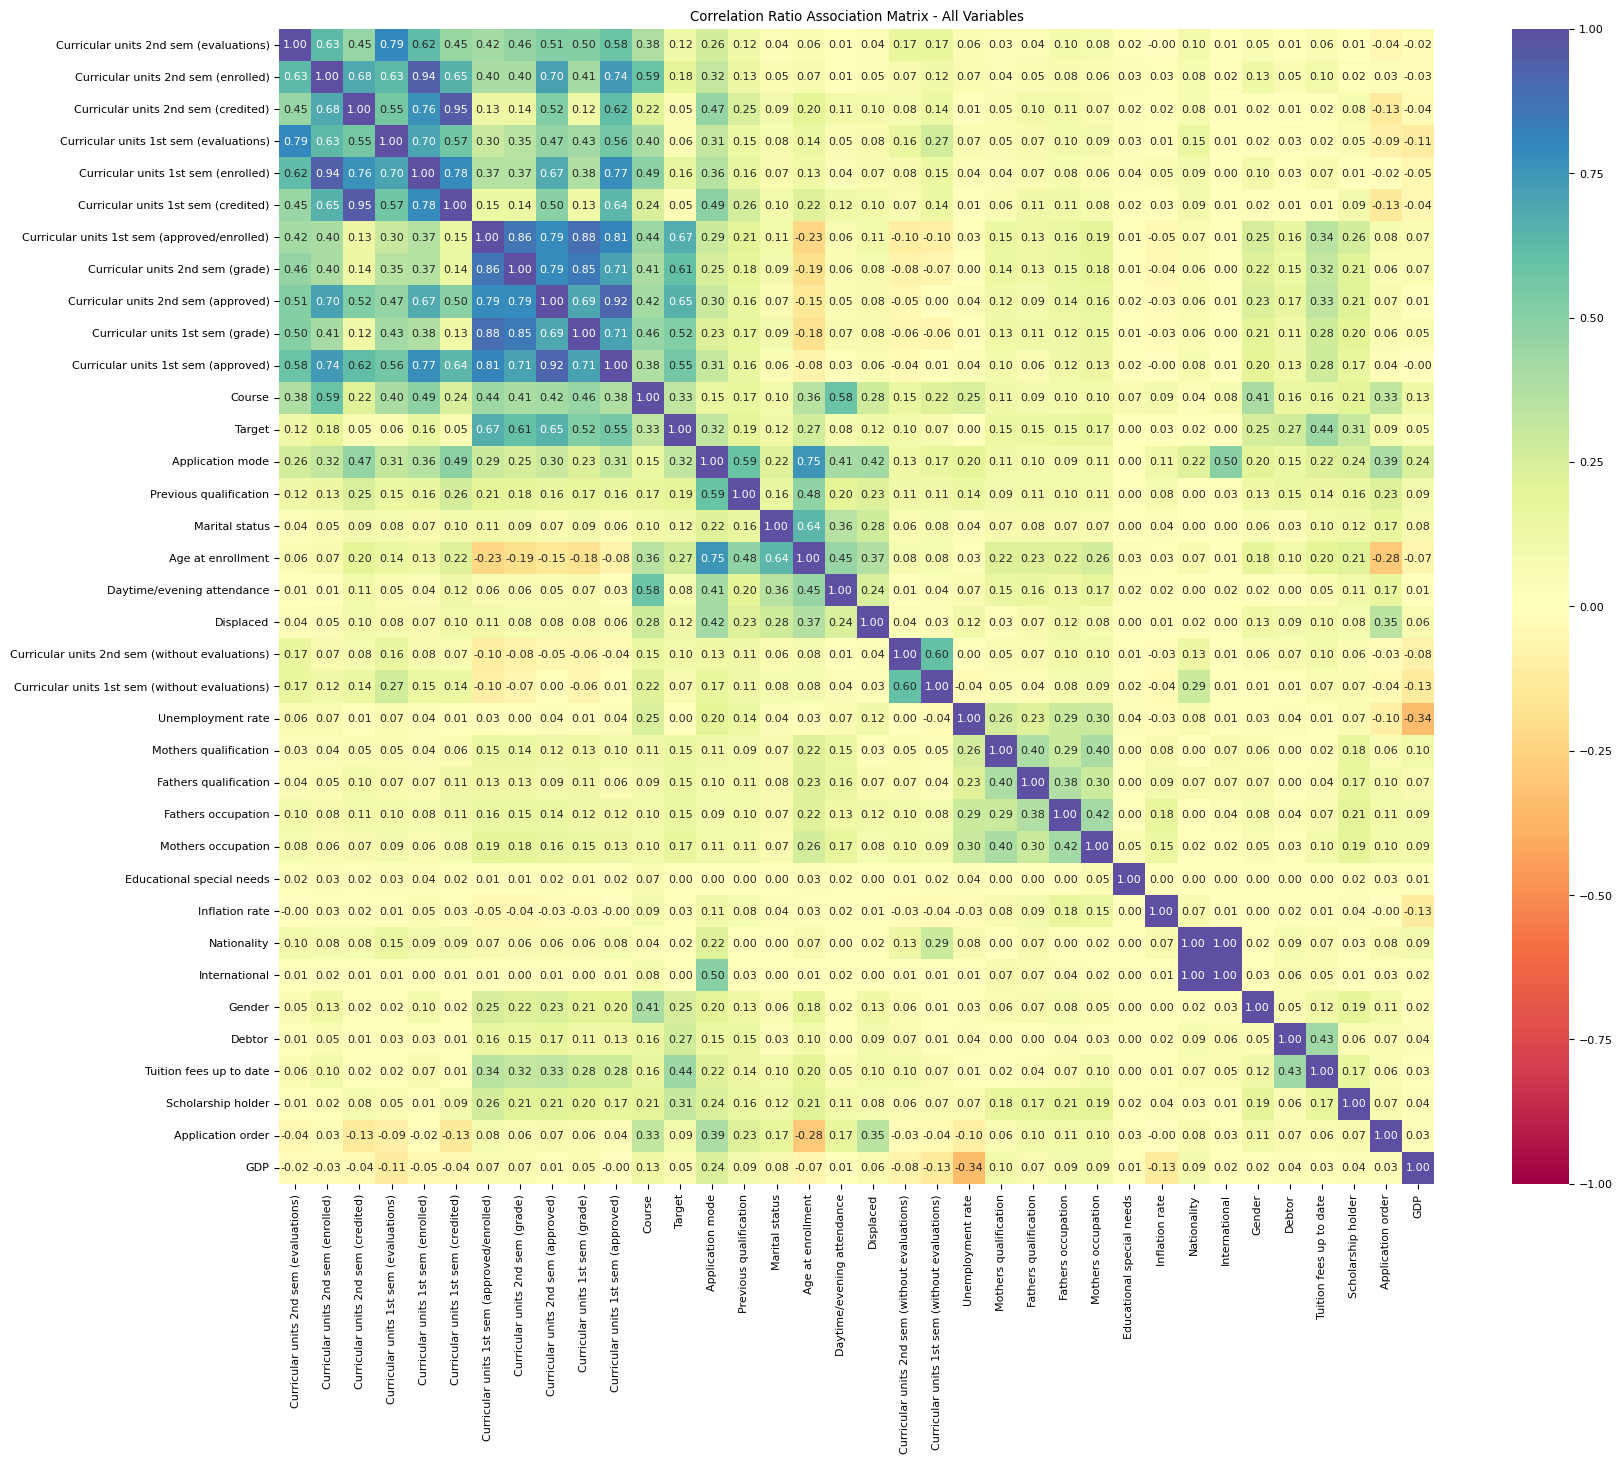

In [18]:
# plot association matrix for all variables
fig, ax2 = plt.subplots(figsize=(20,15))
associations(df0,
            nominal_columns = cat_vars, 
            numerical_columns = cont_vars,
            nom_nom_assoc = 'cramer', 
            cmap = 'Spectral', 
            ax = ax2, 
            clustering = True, # strong variables will be displayed close together
            title = 'Correlation Ratio Association Matrix - All Variables')
plt.show()

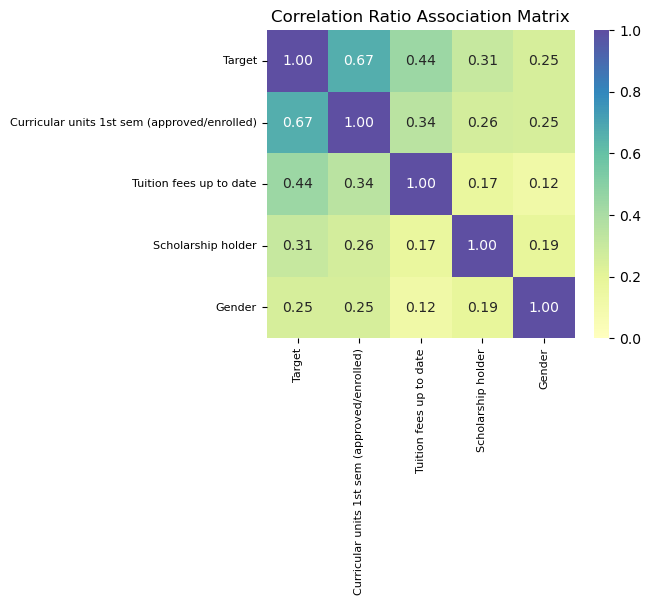

In [19]:
# check for colinearity between the final Categorical and Continuous variables
fig, ax2 = plt.subplots(figsize=(5,4))
plt.rcParams.update({'font.size': 10})

cat_final_vars = ['Tuition fees up to date','Scholarship holder','Gender','Target'] # included Gender as a demographic variable
cont_final_vars = ['Curricular units 1st sem (approved/enrolled)']

associations(df0[np.append(cat_final_vars,cont_final_vars)],
            nominal_columns = cat_final_vars, 
            numerical_columns = cont_final_vars,
            nom_nom_assoc = 'cramer', 
            cmap = 'Spectral', 
            ax = ax2, 
            clustering = True,
            title = 'Correlation Ratio Association Matrix')
plt.show()

In [20]:
df_cleaned = df0[cat_final_vars + cont_final_vars]
df_cleaned.sample(5)

,Tuition fees up to date,Scholarship holder,Gender,Target,Curricular units 1st sem (approved/enrolled)
3222,1.0,1.0,0.0,0.0,1.000000
755,1.0,0.0,0.0,0.0,1.000000
2969,0.0,1.0,0.0,0.0,1.000000
1211,1.0,1.0,1.0,0.0,0.857143
2393,1.0,0.0,0.0,0.0,1.000000


In [21]:
# df_cleaned.to_csv('df_cleaned.csv', index=False)
df = df_cleaned

## Logistic Model

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Tuition fees up to date','Scholarship holder','Gender','Curricular units 1st sem (approved/enrolled)']], 
                                                    df['Target'], 
                                                    test_size=0.3, 
                                                    random_state=13)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data from array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Tuition fees up to date','Scholarship holder','Gender','Curricular units 1st sem (approved/enrolled)'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Tuition fees up to date','Scholarship holder','Gender','Curricular units 1st sem (approved/enrolled)'])

# Create a logistic regression model (no incercept)
logistic_reg_model = LogisticRegression(random_state=13,
                                        fit_intercept=False)

# Train the model
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test_scaled)

# Accuracy of predictions on training data
y_score_train = logistic_reg_model.score(X_train_scaled, y_train)
# Accuracy of predictions on testing data
y_score_test = logistic_reg_model.score(X_test_scaled, y_test)

# How well is the model predicting
print('Train score: ', y_score_train)
print('Test score: ', y_score_test, '\n')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Evaluation metrics
print('Accuracy: ', accuracy, '\n')
print('Confusion Matrix:\n', conf_matrix, '\n')
print('Classification Report:\n', classification_rep, '\n')

Train score:  0.8756395120031484
Test score:  0.8659320477502296 

Accuracy:  0.8659320477502296 

Confusion Matrix:
 [[621  37]
 [109 322]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       658
         1.0       0.90      0.75      0.82       431

    accuracy                           0.87      1089
   macro avg       0.87      0.85      0.86      1089
weighted avg       0.87      0.87      0.86      1089
 



In [24]:
print('intercept ', logistic_reg_model.intercept_[0])
print('classes', logistic_reg_model.classes_)
coef_df = pd.DataFrame({'coeff': logistic_reg_model.coef_[0]}, 
             index=X_train_scaled.columns)
coef_df['% effect'] =  coef_df['coeff'].apply(lambda x: np.round(100* np.exp(x),2) if x<0 else np.round(100* (np.exp(x)-1),2))

coef_df

intercept  0.0
classes [0. 1.]


,coeff,% effect
Tuition fees up to date,-1.196692,30.22
Scholarship holder,-0.461859,63.01
Gender,0.188952,20.80
Curricular units 1st sem (approved/enrolled),-1.861610,15.54


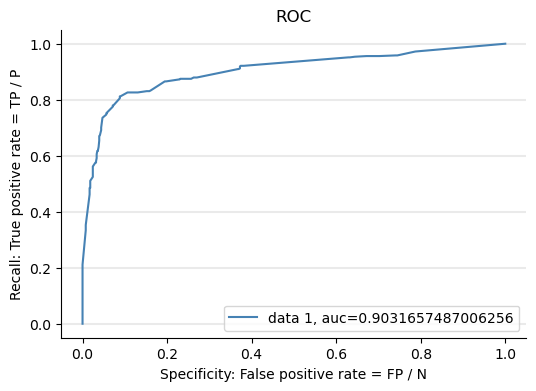

In [25]:
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate
# Shows the tradeoff between sensitivity (y-axis) and specificity (x-axis)

y_pred_probability = logistic_reg_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_probability)
auc = roc_auc_score(y_test, y_pred_probability)

fig = plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, label="data 1, auc="+str(auc), color = 'steelblue')
plt.ylabel('Recall: True positive rate = TP / P')
plt.xlabel('Specificity: False positive rate = FP / N')
plt.title('ROC')
plt.legend(loc=4)
plt.grid(linestyle='-', linewidth=1.5, color='#999999', alpha=0.2, axis='y')

# remove top and right borders
for pos in ['top', 'right']: plt.gca().spines[pos].set_visible(False)
plt.show()